# Latar Belakang
Sebuah perusahaan rumah produksi ingin membuat film layar lebar yang bisa ditayangkan di *OTT* terkemuka seperti *Netflix*. *Netflix* sendiri memiliki program *Netflix Originals* yang memungkinkan rumah produksi manapun untuk bisa membuat film bersama dengan *Netflix* (*Co-Production*) untuk akhirnya bisa ditayangkan di *OTT* tersebut. Untuk menentukan rumah produksi mana yang *Netflix* inginkan, biasanya mereka melakukan tender terbuka yang bisa diikuti oleh rumah produksi manapun.

## Pernyataan Masalah

Perusahaan ingin mengetahui **film seperti apa yang punya peluang paling besar untuk memenangkan tender**. Informasi ini akan membantu *brainstorming* tim kreatif dalam merancang proposal untuk diikut sertakan dalam tender *Netflix Originals*.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Apa karakteristik film *Netflix Originals* yang punya peluang paling besar untuk memenangkan tender?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisis data film *Netflix Originals* yang dirilis dari tanggal 13 Desember 2014 hingga 27 Mei 2021.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal

import warnings
warnings.filterwarnings("ignore")

Ada 6 Kolom di dalam dataset *Netflix Originals*, yaitu:

* `Title`: Judul dari film
* `Genre`: Genre dari film
* `Premiere`: Awal penayangan di *Netflix*
* `Runtime`: Durasi film 
* `IMDB Score`: Penilaian film oleh pengguna IMDb (pada tanggal 06/01/2021)
* `Language`: Bahasa yang tersedia (pada tanggal 06/01/2021)

Berikut 5 baris teratas dan terbawah dari dataset *Netflix Originals*.


In [171]:
df=pd.read_csv('Netflix Originals.csv', index_col=0)
display(df.head(),df.tail())

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,#REALITYHIGH,Comedy,"September 8, 2017",99,5.2,English
1,13th,Documentary,"October 7, 2016",100,8.2,English
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,"January 26, 2017",36,7.1,English
3,15 August,Comedy-drama,"March 29, 2019",124,5.8,Marathi
4,1922,Horror/Crime drama,"October 20, 2017",102,6.3,English


,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,XOXO,Drama,"August 26, 2016",92,5.3,English
580,Yeh Ballet,Drama,"February 21, 2020",117,7.6,Hindi
581,Yes Day,Comedy,"March 12, 2021",86,5.7,English
582,You've Got This,Romantic comedy,"October 2, 2020",111,5.8,Spanish
583,Zion,Documentary,"August 10, 2018",11,7.2,English


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita, dan juga menangani anomali-anomali yang ada di dalam dataset kita. Anomali tersebut akan ditangani, dan penanganannya akan disertai dengan justifikasi yang sesuai.

Mari kita lihat informasi umum dari dataset *Netflix Originals*:

In [172]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (584, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  580 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.9+ KB


In [173]:
display(df.describe(), df.describe(include='object'))

,Runtime,IMDB Score
count,584.000000,580.000000
mean,93.577055,6.277414
std,27.761683,0.978380
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,108.000000,7.000000
max,209.000000,9.000000


,Title,Genre,Premiere,Language
count,584,584,584,584
unique,584,115,390,38
top,#REALITYHIGH,Documentary,"October 2, 2020",English
freq,1,159,6,401


In [174]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Title,584,"[#REALITYHIGH, 13th, 13th: A Conversation with Oprah Winfrey & Ava DuVernay, 15 August, 1922, 22 July, 5 Star Christmas, 6 Balloons, 6 Underground, 7 años, A 3 Minute Hug, A Babysitter's Guide to Monster Hunting, A California Christmas, A Christmas Prince, A Christmas Prince: The Royal Baby, A Christmas Prince: The Royal Wedding, A Fall from Grace, A Futile and Stupid Gesture, A Life of Speed: The Juan Manuel Fangio Story, A Love Song for Latasha, A Secret Love, A Tale of Two Kitchens, A Very Murray Christmas, A Week Away, A Whisker Away, After Maria, After the Raid, Airplane Mode, Ajeeb Daastaans, AK vs AK, Alex Strangelove, Alien Xmas, All Because of You, All Day and a Night, All in My Family, All the Bright Places, All Together Now, Altered Carbon: Resleeved, Always Be My Maybe, Amanda Knox, Amateur, American Factory, American Factory: A Conversation with the Obamas , American Murder: The Family Next Door, American Son, Anelka: Misunderstood, Angela's Christmas, Angela's Christmas Wish, Anima, Antoine Griezmann: The Making of a Legend, Apostle, Ariana Grande: Excuse Me, I Love You, Arlo the Alligator Boy, Army of the Dead, ARQ, Athlete A, Audrie & Daisy, Back to School, Bad Trip, Baggio: The Divine Ponytail, Barbra: The Music, The Mem'ries, The Magic!, Barry, Beasts of No Nation, Beats, Becoming, Been So Long, Below Zero, Ben Platt: Live from Radio City Music Hall, Benji, Between Two Ferns: The Movie, Bigflo & Oil: Hip Hop Frenzy, Biggie: I Got a Story to Tell, Bikram: Yogi, Guru, Predator, Bird Box, Birders, Blackpink: Light Up the Sky, Blame!, Blue Miracle, Bomb Scared, Brahman Naman, Brene Brown: The Call to Courage, Bright, Bulbbul, Burning Sands, Cadaver, Calibre, Cam, Candy Jar, Canvas , Cargo, Casting JonBenet, Caught by a Wave, Chadwick Boseman: Portrait of an Artist, Chasing Coral , Choked: Paisa Bolta Hai, Chopsticks, Christmas Crossfire, Christmas Inheritance, Circus of Books, Citation, ...]"
1,Genre,115,"[Comedy, Documentary, Aftershow / Interview, Comedy-drama, Horror/Crime drama, Drama, Action, Comedy/Fantasy/Family, Romantic comedy, Thriller, Biographical/Comedy, Comedy / Musical, Christian musical, Anime/Fantasy, Stop Motion, Action comedy, Romance, Anime/Science fiction, Sports-drama, Animation, Musical / Short, Horror-thriller, Concert Film, Animated musical comedy, Zombie/Heist, Science fiction/Thriller, Hidden-camera prank comedy, Biopic, War drama, Musical, Family film, Psychological thriller, Black comedy, Urban fantasy, Horror, Psychological horror, Animation / Short, Drama/Horror, Romantic teen drama, Romantic drama, Heist, Musical comedy, Family, Horror thriller, Mentalism special, Christmas musical, Teen comedy-drama, Mystery, Dark comedy, Crime drama, Animation/Superhero, Family/Comedy-drama, Mockumentary, Supernatural drama, Action/Comedy, Horror anthology, Romantic comedy/Holiday, Adventure-romance, Action-thriller, Animation / Science Fiction, Science fiction/Drama, Family/Christmas musical, Variety show, Animation/Christmas/Comedy/Adventure, Comedy horror, One-man show, Anthology/Dark comedy, Variety Show, Adventure, Comedy mystery, Science fiction/Mystery, Action-adventure, Historical-epic, Action/Science fiction, Animation/Musical/Adventure, Science fiction thriller, Drama-Comedy, Musical/Western/Fantasy, Romance drama, Superhero, Romantic thriller, Psychological thriller drama, Science fiction adventure, Satire, Making-of, Animation / Comedy, War, Science fiction, Coming-of-age comedy-drama, Crime thriller, Romantic comedy-drama, Anime / Short, Science fiction/Action, Animation / Musicial, Spy thriller, Teen comedy horror, Comedy/Horror, Western, Christmas/Fantasy/Adventure/Comedy, Christmas comedy, ...]"
2,Premiere,390,"[September 8, 2017, October 7, 2016, January 26, 2017, March 29, 2019, October 20, 2017, October 10, 2018, December 7, 2018, April 6, 2018, December 13, 2019, October 28, 2016, October 28, 2019, October 15, 2020, Dece

In [175]:
# Korelasi antara feature IMDB Score dan Runtime

df.corr(method='spearman').loc['IMDB Score', 'Runtime']

-0.02204803168559811

Secara umum, kita bisa melihat bahwa:
* Dataset *Netflix Originals* memiliki 584 baris dan 6 kolom. 
* *Feature* `IMDB Score` dan `Runtime` memiliki korelasi yang rendah (-0.0229), maka dari itu kita akan menghiraukan *feature* `Runtime` dalam analisis ini.
* *Feature* `Title` berperan sebagai id unik untuk tiap film, sehingga *feature* tersebut tidak masuk dalam analisis.
* Ada salah tik pada *feature* `Language` seperti "Thia/English", kita akan menghiraukan hal ini karena tidak berpengaruh terhadap analisis.
* Data pada kolom `Genre` akan dibuat kapital supaya seragam.
* Kita akan merubah format *feature* `Premiere` menjadi musim film tersebut dirilis (perilisan di bulan *December*, *January*, *February* menjadi *Winter*, *March*, *April*, *May* menjadi *Spring*, *June*, *July*, *August* menjadi *Summer*, *September*, *October*, *November* menjadi *Fall*). Ini dibutuhkan karena dengan kita mengubah format menjadi musim, perusahaan lebih punya keleluasaan dalam menentukan tanggal perilisannya.
* Kita akan membuat *feature* `English` yang menunjukkan apakah film tersedia dalam bahasa inggris atau tidak. Ini akan membantu kita dalam menentukan bahasa untuk film yang akan perusahaan buat.
* Terdapat data kosong pada kolom `IMDB Score`. Karena data yang kita miliki sedikit dan data kosongnya sedikit, maka kita akan mengisi data kosong tersebut dengan data aktual yang didapat dari [IMDb](https://www.imdb.com/). Walaupun pengambilan data berbeda waktu, kita akan berasumsi bahwa kualitas film tidak akan membaik/memburuk seiring berjalannya waktu.

### Data Cleaning

Pertama, kita akan merubah format *feature* `Genre` menjadi kapital:

In [176]:
# Menyamakan data di feature Genre menjadi kapital

df['Genre'] = df['Genre'].str.upper()
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,#REALITYHIGH,COMEDY,"September 8, 2017",99,5.2,English
1,13th,DOCUMENTARY,"October 7, 2016",100,8.2,English
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,AFTERSHOW / INTERVIEW,"January 26, 2017",36,7.1,English
3,15 August,COMEDY-DRAMA,"March 29, 2019",124,5.8,Marathi
4,1922,HORROR/CRIME DRAMA,"October 20, 2017",102,6.3,English


Selanjutnya, kita akan merubah format *feature* `Premiere` dari tanggal perilisan, menjadi pada musim apa film itu dirilis:

In [177]:
# Merubah format feature Premiere

musim = df['Premiere'].copy()

for i in range(0,584):
    if 'March' in musim[i]:
        musim[i] = 'Spring'
    elif 'April' in musim[i]:
        musim[i] = 'Spring'
    elif 'May' in musim[i]:
        musim[i] = 'Spring'
    elif 'June' in musim[i]:
        musim[i] = 'Summer'
    elif 'July' in musim[i]:
        musim[i] = 'Summer'
    elif 'August' in musim[i]:
        musim[i] = 'Summer'
    elif 'September' in musim[i]:
        musim[i] = 'Fall'
    elif 'October' in musim[i]:
        musim[i] = 'Fall'
    elif 'November' in musim[i]:
        musim[i] = 'Fall'
    elif 'December' in musim[i]:
        musim[i] = 'Winter'
    elif 'January' in musim[i]:
        musim[i] = 'Winter'
    elif 'February' in musim[i]:
        musim[i] = 'Winter'

df['Premiere'] = musim

df['Premiere'].unique()

array(['Fall', 'Winter', 'Spring', 'Summer'], dtype=object)

Selanjutnya, kita akan membuat *feature* `English`:

In [178]:
# Membuat Feature English

df_ENG = df[df["Language"].str.contains("English")].copy()

df_NENG = df.drop(df[df["Language"].str.contains("English")].index).copy()

dfa = df_ENG[['Language']]

dfb = df_NENG[['Language']]

dfa['Language'] = 'ENGLISH'

dfb['Language'] = 'NON-ENGLISH'

df['English'] = dfa.append(dfb)

df['English'].unique()

array(['ENGLISH', 'NON-ENGLISH'], dtype=object)

Selanjutnya, kita akan mengeluarkan *feature* `Runtime` dari dataset:

In [179]:
# Mengeluarkan feature Runtime

df = df.drop(['Runtime'], axis=1)
df.head()

,Title,Genre,Premiere,IMDB Score,Language,English
0,#REALITYHIGH,COMEDY,Fall,5.2,English,ENGLISH
1,13th,DOCUMENTARY,Fall,8.2,English,ENGLISH
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,AFTERSHOW / INTERVIEW,Winter,7.1,English,ENGLISH
3,15 August,COMEDY-DRAMA,Spring,5.8,Marathi,NON-ENGLISH
4,1922,HORROR/CRIME DRAMA,Fall,6.3,English,ENGLISH


## Missing Value

Kita akan mengisi *Missing Value* dari *feature* `IMDB Score` dengan data aktual yang didapat dari [IMDb](https://www.imdb.com/):

In [180]:
# Semua baris data yang tidak memiliki nilai di feature IMDB Score

df[df['IMDB Score'].isna()]

,Title,Genre,Premiere,IMDB Score,Language,English
189,Guilty,THRILLER,Spring,NaN,Hindi,NON-ENGLISH
332,Paris Is Us,ROMANCE DRAMA,Winter,NaN,French,NON-ENGLISH
365,Rim of the World,SCIENCE FICTION ADVENTURE,Spring,NaN,English,ENGLISH
569,What Would Sophia Loren Do?,DOCUMENTARY,Winter,NaN,English,ENGLISH


In [181]:
# Index dari data kosong

index_na = df[df['IMDB Score'].isna()].index
index_na

Int64Index([189, 332, 365, 569], dtype='int64')

In [182]:
# Mengisi nilai kosong berdasarkan nilai ril yang didapat dari situs resmi IMDB

df['IMDB Score'][df['Title'] == 'Guilty'] = 5.4

df['IMDB Score'][df['Title'] == 'Paris Is Us'] = 4.6

df['IMDB Score'][df['Title'] == 'Rim of the World'] = 5.2

df['IMDB Score'][df['Title'] == 'What Would Sophia Loren Do?'] = 6.6

In [183]:
# Data kosong sudah terisi

df.iloc[index_na]

,Title,Genre,Premiere,IMDB Score,Language,English
189,Guilty,THRILLER,Spring,5.4,Hindi,NON-ENGLISH
332,Paris Is Us,ROMANCE DRAMA,Winter,4.6,French,NON-ENGLISH
365,Rim of the World,SCIENCE FICTION ADVENTURE,Spring,5.2,English,ENGLISH
569,What Would Sophia Loren Do?,DOCUMENTARY,Winter,6.6,English,ENGLISH


## Data yang sudah bersih

Mari kita lihat sekilas info dari data yang sudah dibersihkan

In [184]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(584, 6)


,dataFeatures,dataType,null,unique,uniqueSample
0,Title,object,0,584,"[Sitara: Let Girls Dream, Mrs. Serial Killer]"
1,Genre,object,0,114,"[MUSICAL / SHORT, FAMILY FILM]"
2,Premiere,object,0,4,"[Summer, Winter]"
3,IMDB Score,float64,0,54,"[4.9, 7.7]"
4,Language,object,0,38,"[English/Korean, Spanish]"
5,English,object,0,2,"[NON-ENGLISH, ENGLISH]"


Setelah *Data Understanding and Cleaning*, tidak terjadi perubahan jumlah data, dan *Mising Values* sudah diisi.

# Data Analysis

Kita akan melakukan analisis untuk mencari tahu **apa karakteristik film *Netflix Originals* yang punya peluang paling besar untuk memenangkan tender?**

Pertama-tama, kita harus menentukan film seperti apa yang punya peluang paling besar untuk memenangkan tender.

IMDb memiliki *chart* [IMDb Top 250 Movies](https://www.imdb.com/chart/top/?sort=ir,asc&mode=simple&page=1) yang mengurutkan 250 film terbaik berdasarkan penilaian dari pengguna IMDb. Untuk bisa tergabung dalam *chart* tersebut, suatu film setidaknya harus memiliki `IMDB Score` 8.<br><br>
Untuk memiliki peluang terbaik dalam mengikuti tender *Netflix Originals*, kita akan berasumsi bahwa dengan mengikuti karakteristik film *Netflix Originals* dengan `IMDB Score` 8 atau lebih, kita akan punya peluang terbaik untuk memenangkan tender, maka dari itu kita akan menganalisis **karakteristik film *Netflix Originals* yang memiliki `IMDB Score` 8 atau lebih**.

Kita akan memulai analisis, untuk mencari tahu **apa karakteristik film *Netflix Originals* yang memiliki `IMDB Score` 8 atau lebih?**.  

## `Genre`

Kita akan menganalisis `Genre` dari film *Netflix Originals* yang memiliki `IMDB Score` 8 atau lebih:

In [185]:
# Film dengan IMDB Score yang nilainya 8 atau lebih

df_8 = df[df['IMDB Score']>=8].sort_values(by='IMDB Score', ascending=False).copy()
df_8

,Title,Genre,Premiere,IMDB Score,Language,English
121,David Attenborough: A Life on Our Planet,DOCUMENTARY,Fall,9.0,English,ENGLISH
145,Emicida: AmarElo - It's All For Yesterday,DOCUMENTARY,Winter,8.6,Portuguese,NON-ENGLISH
412,Springsteen on Broadway,ONE-MAN SHOW,Winter,8.5,English,ENGLISH
577,Winter on Fire: Ukraine's Fight for Freedom,DOCUMENTARY,Fall,8.4,English/Ukranian/Russian,ENGLISH
427,Taylor Swift: Reputation Stadium Tour,CONCERT FILM,Winter,8.4,English,ENGLISH
67,Ben Platt: Live from Radio City Music Hall,CONCERT FILM,Spring,8.4,English,ENGLISH
114,Cuba and the Cameraman,DOCUMENTARY,Fall,8.3,English,ENGLISH
118,Dancing with the Birds,DOCUMENTARY,Fall,8.3,English,ENGLISH
383,Seaspiracy,DOCUMENTARY,Spring,8.2,English,ENGLISH
523,The Three Deaths of Marisela Escobedo,DOCUMENTARY,Fall,8.2,Spanish,NON-ENGLISH


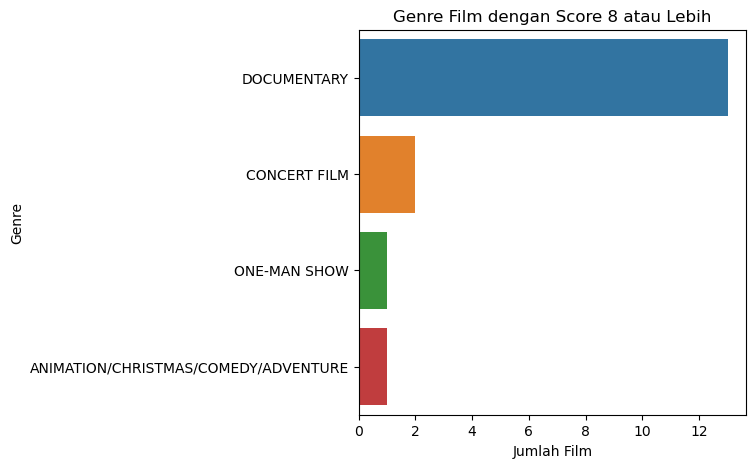

In [209]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_8, y='Genre', order= ['DOCUMENTARY','CONCERT FILM', 'ONE-MAN SHOW', 'ANIMATION/CHRISTMAS/COMEDY/ADVENTURE']);
plt.title('Genre Film dengan Score 8 atau Lebih')
plt.xlabel('Jumlah Film')
plt.yticks()
# plt.xticks(rotation = 90)
plt.show()

Dari grafik di atas, kita bisa melihat bahwa *DOCUMENTARY* menjadi `Genre` yang paling populer untuk film dengan `IMDB Score` 8 atau lebih. <BR><br>
`Genre` lain yang ada di grafik yaitu *ONE-MAN SHOW*, *CONCERT FILM*, dan *ANIMATION/CHRISTMAS/COMEDY/ADVENTURE*. *ONE-MAN SHOW* adalah genre film pertunjukkan teater dengan hanya ada 1 penampil dalam penampilannya. Karena kita berencana untuk membuat film layar lebar, maka kita tidak akan merekomendasikan genre tersebut. Untuk `Genre` *CONCERT FILM* biasanya diproduksi untuk dokumentasi sebuah acara konser, dengan alasan yang sama seperti untuk `Genre` *ONE-MAN SHOW*, kita tidak akan merekomendasikan `Genre` *CONCERT FILM*.<br>
Untuk `Genre` *ANIMATION/CHRISTMAS/COMEDY/ADVENTURE*, karena `Genre` film tersebut terdiri dari gabungan beberapa `Genre`, maka kita akan menganalisis masing-masing `Genre` tersebut lebih lanjut.<br>
Jadi dari grafik di atas, kita mendapatakan `Genre` *DOCUMENTARY*, *ANIMATION*, *CHRISTMAS*, *COMEDY*, *ADVENTURE* sebagai `Genre` yang akan kita analisis lebih lanjut.<br><br> Kita akan menganalisis lebih lanjut `Genre` tersebut dengan menggunakan data keseluruhan:

In [187]:
# Membuat data frame untuk untuk analisa genre *ANIMATION/CHRISTMAS/COMEDY/ADVENTURE*

df_CHRISTMAS = df[df["Genre"].str.contains("CHRISTMAS")]

df_ADVENTURE = df[df["Genre"].str.contains("ADVENTURE")]

df_ANIMATION = df[df["Genre"].str.contains("ANIMATION")]

df_COMEDY = df[df["Genre"].str.contains("COMEDY")]

df_DOCUMENTARY = df[df["Genre"].str.contains("DOCUMENTARY")]

In [188]:
df1 = df_COMEDY[['Genre', 'IMDB Score']]

df2 = df_ANIMATION[['Genre', 'IMDB Score']]

df3 = df_ADVENTURE[['Genre', 'IMDB Score']]

df4 = df_CHRISTMAS[['Genre', 'IMDB Score']]

df5 = df_DOCUMENTARY[['Genre', 'IMDB Score']]

In [189]:
df1['Genre'] = 'COMEDY'

df2['Genre'] = 'ANIMATION'

df3['Genre'] = 'ADVENTURE'

df4['Genre'] = 'CHRISTMAS'

df5['Genre'] = 'DOCUMENTARY'

In [190]:
df_GENRE = df1.append(df2)
df_GENRE = df_GENRE.append(df3)
df_GENRE = df_GENRE.append(df4)
df_GENRE = df_GENRE.append(df5)

df_GENRE['Genre'].unique()

array(['COMEDY', 'ANIMATION', 'ADVENTURE', 'CHRISTMAS', 'DOCUMENTARY'],
      dtype=object)

In [211]:
df_GENRE.groupby(by='Genre').count()

,IMDB Score
Genre,
ADVENTURE,10
ANIMATION,16
CHRISTMAS,5
COMEDY,141
DOCUMENTARY,159


Kita akan melihat jumlah film dari masing-masing `Genre`:

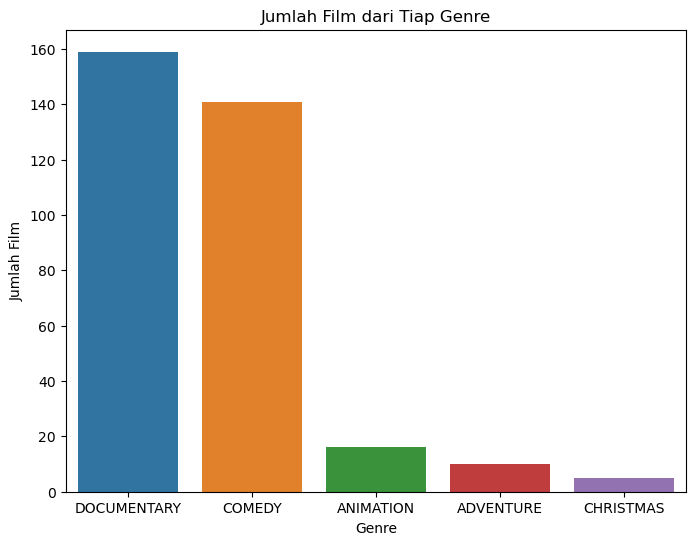

In [191]:
# Membandingkan jumlah film dari Genre Documentary, Comedy, Animation, dan Adventure

plt.figure(figsize=(8,6))
sns.countplot(data=df_GENRE, x='Genre',order=['DOCUMENTARY', 'COMEDY', 'ANIMATION', 'ADVENTURE', 'CHRISTMAS']);
plt.title('Jumlah Film dari Tiap Genre')
plt.ylabel('Jumlah Film')
plt.show()

Dari grafik di atas, kita bisa melihat bahwa `Genre` *DOCUMENTARY* dan *COMEDY* adalah `Genre` yang jauh lebih populer dibandingkan `Genre` lainnya, maka dari itu untuk analisis selanjutnya, kita akan fokus kepada `Genre` *DOCUMENTARY* dan *COMEDY*.<br><br>
Selanjutnya kita akan melihat sebaran data `IMDB Score` dari `Genre` *DOCUMENTARY* dan *COMEDY*:

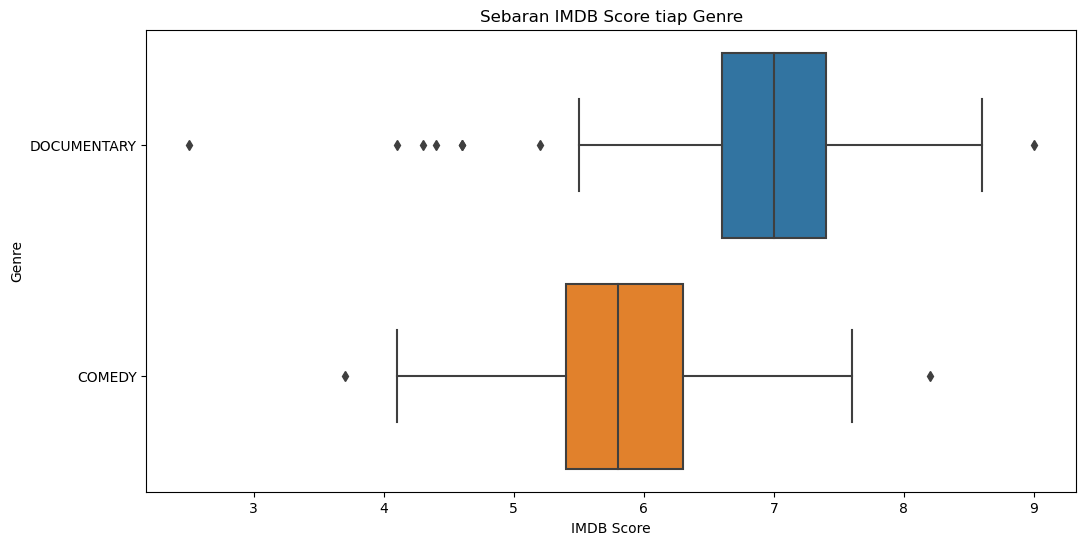

In [192]:
plt.figure(figsize=(12,6))
sns.boxplot(data= df_GENRE, y='Genre', x= 'IMDB Score', order=['DOCUMENTARY', 'COMEDY'])
plt.title('Sebaran IMDB Score tiap Genre')
plt.show()

In [193]:
# Cek distribusi feature IMDB Score

from scipy.stats import normaltest
stats, pval=normaltest(df['IMDB Score'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [194]:
# Uji statistik, apakah ada perbedaan IMDB Score antara Genre DOCUMENTARY dan COMEDY
# Karena distribusi data tidak normal, gunakan mann whitney

stat, pvalue = mannwhitneyu(
    df_GENRE[df_GENRE['Genre']=='COMEDY']['IMDB Score'],
    df_GENRE[df_GENRE['Genre']=='DOCUMENTARY']['IMDB Score'],
)
if pvalue <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


In [195]:
df_GENRE[df_GENRE['Genre']=='DOCUMENTARY'].mean()

IMDB Score    6.936478
dtype: float64

In [196]:
df_GENRE[df_GENRE['Genre']=='COMEDY'].mean()

IMDB Score    5.830496
dtype: float64

Dari grafik dan uji statistik, kita tahu bahwa `IMDB Score` dari *DOCUMENTARY* berbeda signifikan dengan `IMDB Score` dari *COMEDY*, dengan *mean* `IMDB Score` *DOCUMENTARY* 6.9, dan *mean* `IMDB Score` *COMEDY* 5.8. Ini menunjukkan bahwa film *DOCUMENTARY* punya `IMDB Score` yang lebih besar dibanding film *COMEDY*.

## `Premiere`

Setelah menganalisis `Genre`, kita akan menganalisis *feature* `Premiere` dari film *Netflix Originals* yang memiliki IMDB Score 8 atau lebih:

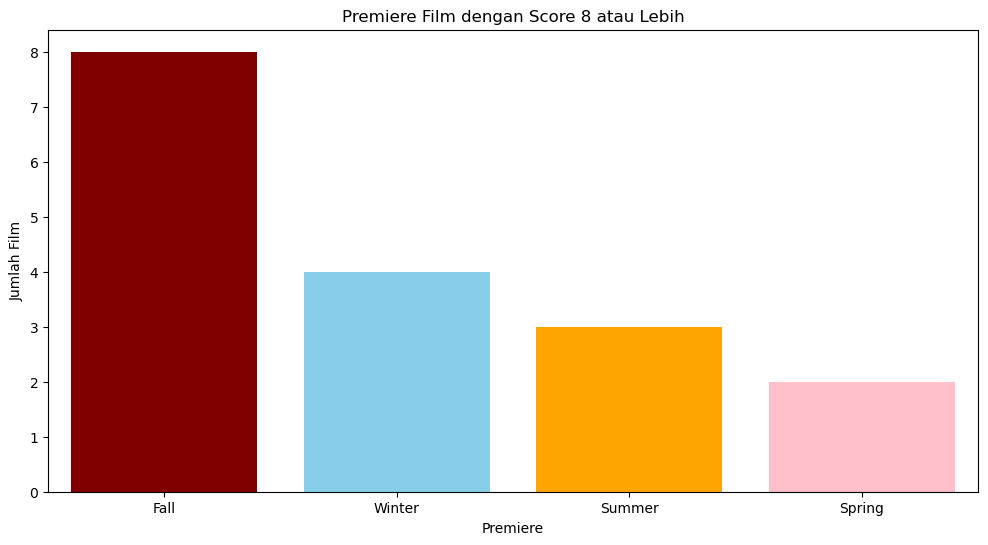

In [197]:
# Sebaran Premiere dari film *Netflix Originals* yang memiliki IMDB Score 8 atau lebih

plt.figure(figsize=(12,6))
a = sns.countplot(data=df_8, x='Premiere', order=['Fall', 'Winter', 'Summer', 'Spring']);
a.patches[0].set_facecolor('maroon')
a.patches[1].set_facecolor('skyblue')
a.patches[2].set_facecolor('orange')
a.patches[3].set_facecolor('pink')
plt.title('Premiere Film dengan Score 8 atau Lebih')
plt.ylabel('Jumlah Film')
plt.show(a)

Dari grafik di atas, kita melihat bahwa perilisan film paling favorit untuk film *Netflix Originals* yang memiliki IMDB Score 8 atau lebih adalah *Fall*. <br><br>Selanjutnya, kita analisis `Premiere` untuk `Genre` yang sudah kita analisis, yaitu *DOCUMENTARY* dan *COMEDY*:

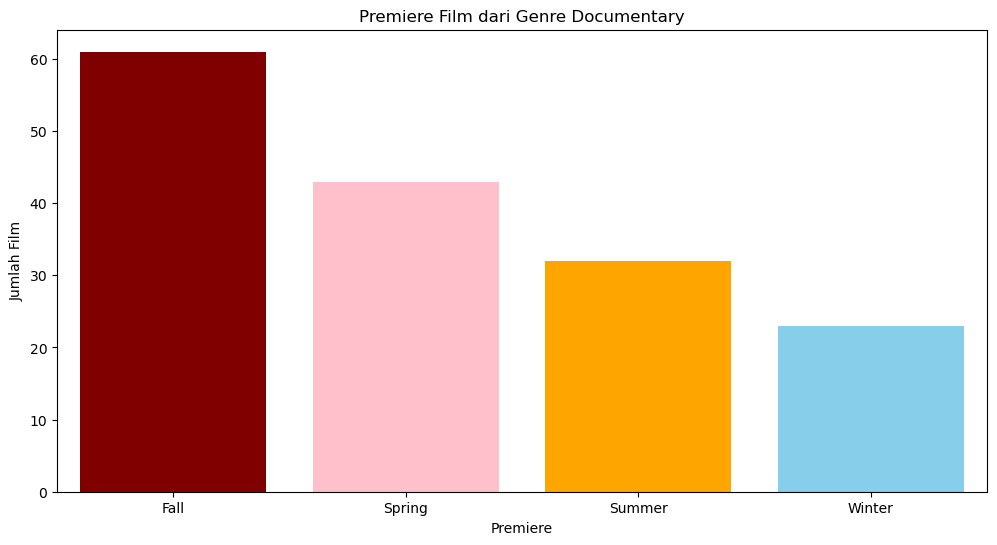

In [198]:
# Sebaran Premiere Film dengan Genre Documentary

plt.figure(figsize=(12,6))
b = sns.countplot(data=df_DOCUMENTARY, x='Premiere',order=['Fall', 'Spring', 'Summer', 'Winter']);
plt.title('Premiere Film dari Genre Documentary')
b.patches[0].set_facecolor('maroon')
b.patches[3].set_facecolor('skyblue')
b.patches[2].set_facecolor('orange')
b.patches[1].set_facecolor('pink')
plt.ylabel('Jumlah Film')
plt.show()

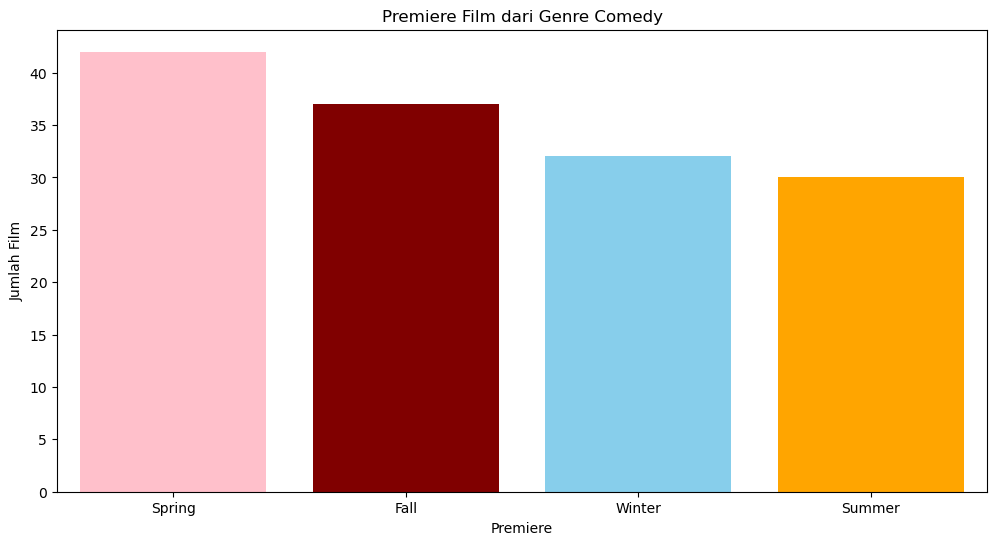

In [199]:
# Sebaran Premiere Film dengan Genre Documentary

plt.figure(figsize=(12,6))
c = sns.countplot(data=df_COMEDY, x='Premiere',order=['Spring', 'Fall', 'Winter', 'Summer']);
plt.title('Premiere Film dari Genre Comedy')
c.patches[1].set_facecolor('maroon')
c.patches[2].set_facecolor('skyblue')
c.patches[3].set_facecolor('orange')
c.patches[0].set_facecolor('pink')
plt.ylabel('Jumlah Film')
plt.show()

Dari grafik pertama, kita bisa melihat bahwa *Fall* menjadi musim perilisan paling favorit untuk `Genre` *DOCUMENTARY*.<br>
Dari grafik kedua, kita bisa melihat bahwa *Spring* menjadi musim perilisan paling favorit untuk `Genre` *COMEDY*, diikuti oleh *Fall* sebagai kedua favorit.<br><br>Jika kita bandingkan sebaran `Premiere` dari film *Netflix Originals* yang memiliki `IMDB Score` 8 atau lebih dan `Premiere` dari `Genre` *DOCUMENTARY* dan *COMEDY*, ada kemiripan pada kecenderungan `Premiere` yaitu *Fall*. Walaupun untuk *COMEDY* lebih populer dirilis pada *Spring*, *Fall* hanya terpaut 5 film dari *Spring*.

## `Language`

Terakhir kita akan menganalisis `Language`.

Mari kita lihat sebaran `Language` dari film *Netflix Originals* yang memiliki IMDB Score 8 atau lebih:

In [200]:
# Membuat data frame untuk analisa genre *ANIMATION/CHRISTMAS/COMEDY/ADVENTURE*

df_ENG1 = df_8[df_8["Language"].str.contains("English")].copy()

df_NENG1 = df_8.drop(df_8[df_8["Language"].str.contains("English")].index).copy()

In [201]:
dfc = df_ENG1[['Title','Genre', 'IMDB Score', 'Language']]

dfd = df_NENG1[['Title','Genre', 'IMDB Score', 'Language']]

In [202]:
dfc['Language'] = 'ENGLISH'

dfd['Language'] = 'NON-ENGLISH'

In [203]:
df_8L = dfc.append(dfd)

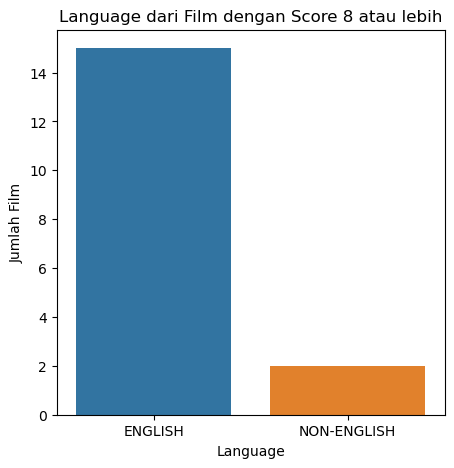

In [204]:
# Perbandingan jumlah film berbahasa inggris dengan yang tidak dari film *Netflix Originals* yang memiliki IMDB Score 8 atau lebih

plt.figure(figsize=(5,5))
sns.countplot(data=df_8L, x='Language', order= ['ENGLISH', 'NON-ENGLISH']);
plt.title('Language dari Film dengan Score 8 atau Lebih')
plt.ylabel('Jumlah Film')
plt.show()

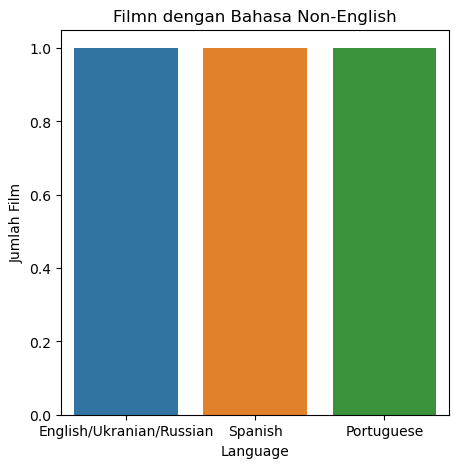

In [205]:
# Film dengan bahasa Non-English dari film *Netflix Originals* yang memiliki IMDB Score 8 atau lebih

plt.figure(figsize=(5,5))
sns.countplot(data=df_8, x='Language', order= ['English/Ukranian/Russian', 'Spanish', 'Portuguese']);
plt.title('Filmn dengan Bahasa Non-English')
plt.ylabel('Jumlah Film')
plt.yticks()
plt.show()

Dari dua grafik di atas, kita bisa lihat bahwa `Language` *English* menjadi bahasa favorit film *Netflix Originals* dengan IMDB Score 8 atau lebih. Film *Non-English* pun hanya terdiri dari *English/Ukranian/Russian*, *Portuguese*, *Spanish*.<br><br>Lalu bagaimana dengan sebaran `Language` *English* dan *Non-English* dari semua film *Netflix Originals*?

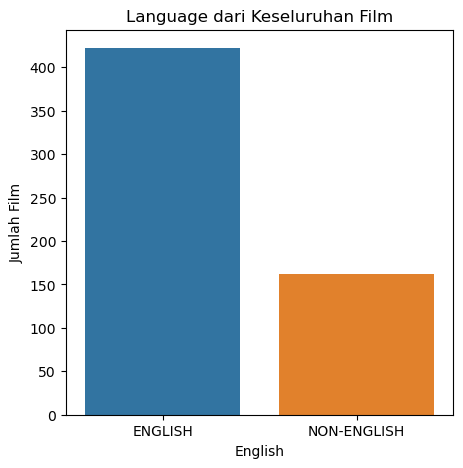

In [206]:
# Perbandingan jumlah film berbahasa inggris dari data keseluruhan

plt.figure(figsize=(5,5))
sns.countplot(data=df, x='English');
plt.title('Language dari Keseluruhan Film')
plt.ylabel('Jumlah Film')
plt.show()

Dari grafik di atas, kita bisa melihat bahwa secara keseluruhan, film dengan `Language` *English* lebih populer dibandingkan *Non-English*.<br><br>

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita dapat menentukan kesimpulan analisis karakteristik film *Netflix Originals* dengan IMDB Score 8 atau lebih:
* *DOCUMENTARY* menjadi `Genre` dengan jumlah film terbanyak, disusul oleh *COMEDY*. Jika kita lihat sebaran `Genre` dari keseluruhan film, *DOCUMENTARY* dan *COMEDY* juga menjadi `Genre` favorit pertama dan kedua.
* Waktu `Premiere` yang paling populer untuk perilisan film adalah *Fall*. Untuk `Genre` *DOCUMENTARY* waktu `Premiere` yang paling populer adalah *Fall*, dan untuk *COMEDY*, *Spring* dan *Fall* hanya terpaut 5 film.
* `Language`

Rekomendasi yang bisa kita berikan untuk menjawaban pertanyaan **Apa karakteristik film *Netflix Originals* yang punya peluang paling besar untuk memenangkan tender?** adalah sebagai berikut:
* Film *DOCUMENTARY* yang dirilis pada *Fall* dengan bahasa *English*, atau
* Film *COMEDY* yang dirilis pada *Fall* atau *Spring* dengan bahasa *English*

In [207]:
# df.to_csv('Netflix Originals Clean.csv', index=False)